# Amplitude Spectrum

-   Draw the amplitude spectrum.


## Setup

### Import

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

import matplotlib.pyplot as plt
from matplotlib.transforms import ScaledTranslation

from FigureSetting import set_nature_style, mm_to_inches, colors

### Figure Setting

In [2]:
set_nature_style()
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

figsize = (180 * mm_to_inches, 45 * mm_to_inches)
plt.rcParams['figure.figsize'] = figsize

figure_dir = "../figure/"
figure_name = "AmplitudeSpectrum.pdf"
figure_path = figure_dir + figure_name

## Read Data

In [3]:
data_dir = "../data/"

In [4]:
dama_qf = 0.30

In [5]:
amplitude_spectrum_df = pd.read_csv(data_dir + "AmplitudeSpectrum.csv")
amplitude_spectrum_df.head()


,energy_min,energy_max,dama_amplitude,dama_amplitude_error,cosine_nrc_single_amplitude,cosine_nrc_single_amplitude_upper_error,cosine_nrc_single_amplitude_lower_error,cosine_nrc_multiple_amplitude,cosine_nrc_multiple_amplitude_upper_error,cosine_nrc_multiple_amplitude_lower_error,cosine_erc_single_amplitude,cosine_erc_single_amplitude_upper_error,cosine_erc_single_amplitude_lower_error,cosine_erc_multiple_amplitude,cosine_erc_multiple_amplitude_upper_error,cosine_erc_multiple_amplitude_lower_error
0,0.75,1.0,0.019193,0.007962,NaN,NaN,NaN,NaN,NaN,NaN,0.012080,0.021642,0.021343,0.014281,0.010601,0.010469
1,1.00,1.5,0.025661,0.004451,NaN,NaN,NaN,NaN,NaN,NaN,-0.014416,0.011520,0.011556,-0.003502,0.004069,0.004099
2,1.50,2.0,0.019819,0.003686,0.004338,0.014252,0.013960,0.010142,0.007360,0.007580,-0.011597,0.009985,0.009924,0.003122,0.003819,0.003821
3,2.00,2.5,0.018150,0.002295,0.004888,0.009525,0.009870,-0.001015,0.004319,0.004266,0.025443,0.009542,0.009598,-0.005399,0.005505,0.005536
4,2.50,3.0,0.018915,0.002677,-0.015235,0.008218,0.008264,0.002388,0.002814,0.002806,0.002054,0.009395,0.009406,-0.008535,0.006511,0.006529


## Draw Plot

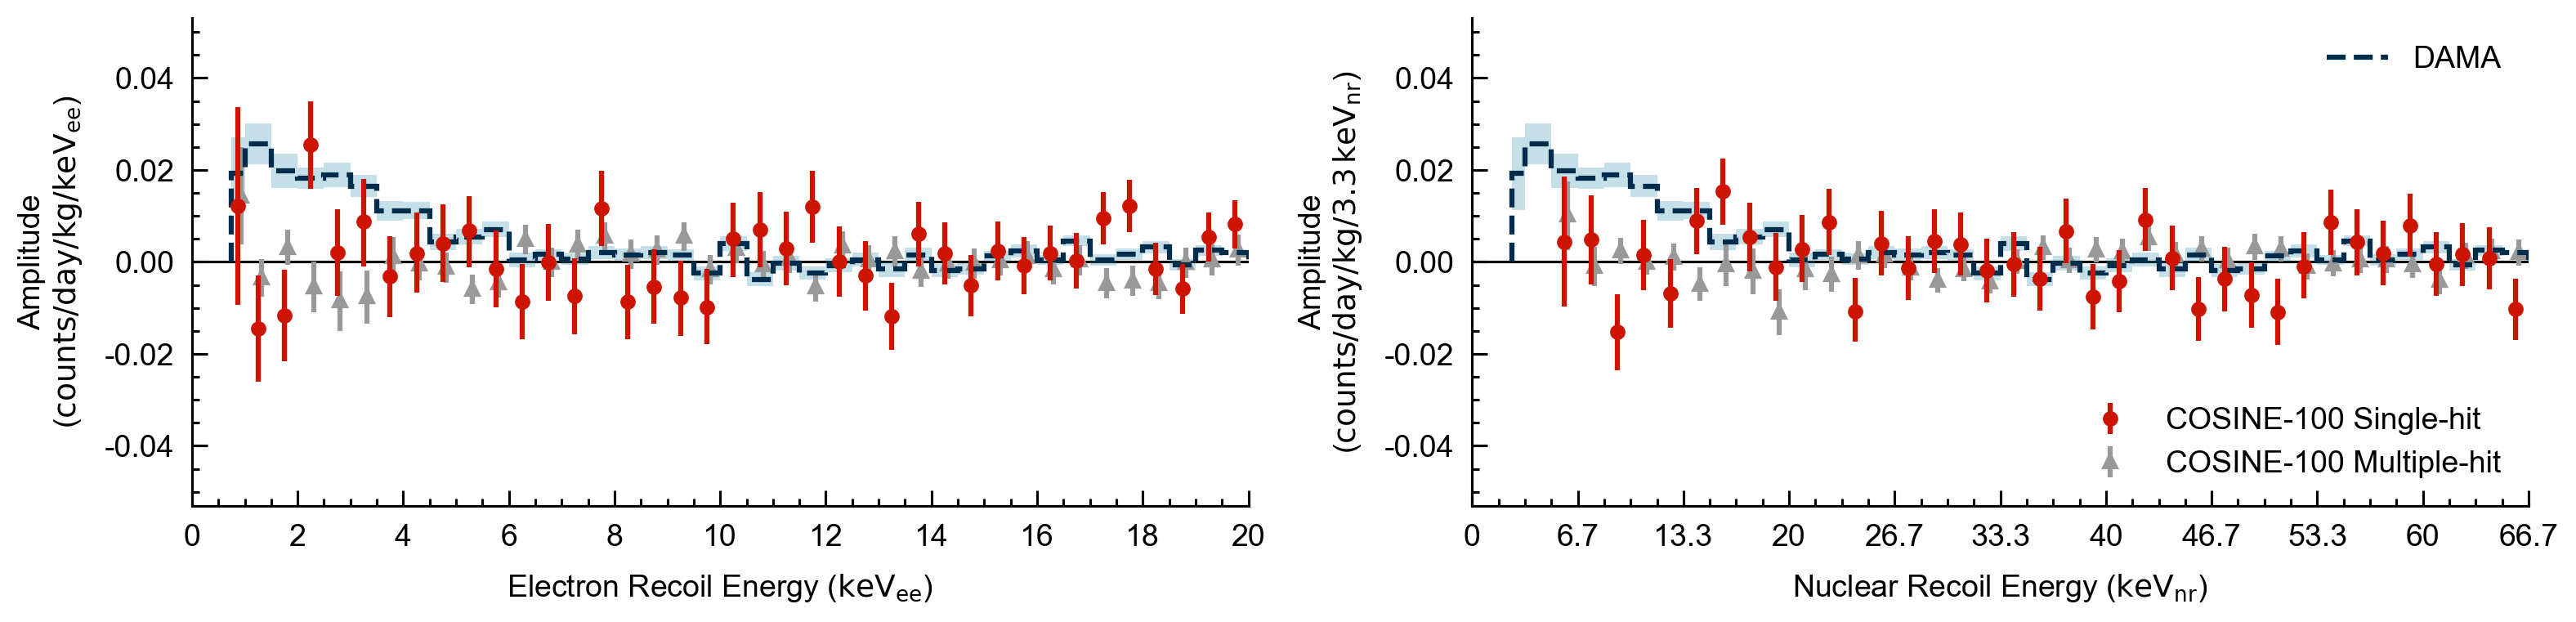

In [6]:
shift = 0.06

fig, axs = plt.subplots(1, 2)

energy_mins = amplitude_spectrum_df["energy_min"]
energy_maxs = amplitude_spectrum_df["energy_max"]
energy_edges = np.append([0, energy_mins[0]], energy_maxs)
energy_centers = (energy_mins + energy_maxs) / 2

for ax, policy in zip(axs, ["erc", "nrc"]):
    # Draw single hit
    y = amplitude_spectrum_df[f"cosine_{policy}_single_amplitude"].values
    y_upper_error = amplitude_spectrum_df[
        f"cosine_{policy}_single_amplitude_upper_error"
    ].values
    y_lower_error = amplitude_spectrum_df[
        f"cosine_{policy}_single_amplitude_lower_error"
    ].values

    draw_single = ax.errorbar(
        energy_centers,
        y,
        yerr=[y_lower_error, y_upper_error],
        fmt="o",
        markersize=2.0,
        color=colors["IbsRed"],
        label="COSINE-100 Single-hit",
        elinewidth=1.0,
        zorder=3,
    )

    # Draw multiple hit
    y = amplitude_spectrum_df[f"cosine_{policy}_multiple_amplitude"].values
    y_upper_error = amplitude_spectrum_df[
        f"cosine_{policy}_multiple_amplitude_upper_error"
    ].values
    y_lower_error = amplitude_spectrum_df[
        f"cosine_{policy}_multiple_amplitude_lower_error"
    ].values

    draw_multiple = ax.errorbar(
        (energy_centers + shift),
        y,
        yerr=[y_lower_error, y_upper_error],
        fmt="^",
        markersize=2.0,
        color=colors["IbsLightGrey"],
        label="COSINE-100 Multiple-hit",
        elinewidth=1.0,
        zorder=1,
    )

    # Draw Dama
    y = amplitude_spectrum_df["dama_amplitude"].values
    y_error = amplitude_spectrum_df["dama_amplitude_error"].values

    draw_dama = ax.stairs(
        np.append(np.nan, y),
        energy_edges,
        color=colors["InfnDeepBlue"],
        linewidth=1.0,
        linestyle="dashed",
        zorder=2,
        label="DAMA",
    )

    y = np.concatenate([[np.nan], y, [np.nan]])
    y_error = np.concatenate([[np.nan], y_error, [np.nan]])
    ax.fill_between(
        energy_edges,
        y - y_error,
        y + y_error,
        color=colors["InfnBlue"],
        edgecolor=None,
        step="post",
        alpha=0.3,
        zorder=0,
    )

    # style
    ax.axhline(0, color="black", linewidth=0.5, linestyle="solid", zorder=-1)

    if policy == "nrc":
        ax.set_xlabel(r"Nuclear Recoil Energy ($\rm{keV_{nr}}$)")
        ax.set_xlim(0, energy_maxs.max())
        ax.set_xticks(np.arange(0, energy_maxs.max() + 1e-6, 0.5), minor=True)
        ax.set_xticks(np.arange(0, energy_maxs.max() + 1e-6, 2), minor=False)
        ax.set_xticklabels(
            [
                f"{int(e):d}" if np.fmod(e, 1.0) == 0.0 else f"{e:.1f}"
                for e in np.arange(
                    0, energy_maxs.max() / dama_qf + 1e-6, 2 / dama_qf
                )
            ],
            minor=False,
        )

        unit = r"($\mathrm{counts/day/kg/3.3 \, keV_{nr}}$)"
        ax.set_ylabel("Amplitude\n" + unit)
    else:
        ax.set_xlabel(r"Electron Recoil Energy ($\rm{keV_{ee}}$)")
        ax.set_xlim(0, energy_maxs.max())
        ax.set_xticks(np.arange(0, energy_maxs.max() + 1e-6, 0.5), minor=True)
        ax.set_xticks(np.arange(0, energy_maxs.max() + 1e-6, 2), minor=False)

        unit = r"($\mathrm{counts/day/kg/keV_{ee}}$)"
        ax.set_ylabel("Amplitude\n" + unit)

    ax.set_ylim(-0.053, 0.053)
    ax.set_yticks(np.arange(-0.05, 0.051, 0.005), minor=True)
    ax.set_yticks(np.arange(-0.04, 0.041, 0.02), minor=False)

    if ax == axs[-1]:
        dama_legend = ax.legend(
            handles=[draw_dama], loc="upper right", frameon=False
        )
        handles = [draw_single, draw_multiple]
        ax.legend(handles=handles, loc="lower right", frameon=False)
        ax.add_artist(dama_legend)

plt.tight_layout()
plt.savefig(figure_path)
plt.show()

## Calculate $\chi^{2}$

### $\chi^{2}$ Calculator

In [7]:
def chi2_calculator(row_min, row_max, policy, coincidence, from_dama=False):
    # get the data
    y = amplitude_spectrum_df[f"cosine_{policy}_{coincidence}_amplitude"].values
    y_upper_error = amplitude_spectrum_df[
        f"cosine_{policy}_{coincidence}_amplitude_upper_error"
    ].values
    y_lower_error = amplitude_spectrum_df[
        f"cosine_{policy}_{coincidence}_amplitude_lower_error"
    ].values

    y = y[row_min:row_max]
    y_upper_error = y_upper_error[row_min:row_max]
    y_lower_error = y_lower_error[row_min:row_max]

    x_min = amplitude_spectrum_df["energy_min"].values[row_min]
    x_max = amplitude_spectrum_df["energy_max"].values[row_max - 1]

    # get the model
    if from_dama:
        y_model = amplitude_spectrum_df["dama_amplitude"].values[
            row_min:row_max
        ]
        error_model = amplitude_spectrum_df["dama_amplitude_error"].values[
            row_min:row_max
        ]
    else:
        y_model = np.zeros_like(y)
        error_model = np.zeros_like(y)

    # calculate the chi2
    deviation = y - y_model
    error = y_upper_error
    error[deviation > 0] = y_lower_error[deviation > 0]
    error = np.sqrt(error ** 2 + error_model ** 2)
    chi2_value = np.sum(deviation ** 2 / error ** 2)

    # calculate the p-value
    dof = len(y)
    p_value = 1 - chi2.cdf(chi2_value, dof)

    # print
    msg = f"{policy:3s} {coincidence:8s} {x_min:5.2f} -{x_max:5.2f} keV"
    if from_dama:
        msg += " from DAMA |"
    else:
        msg += " from NULL |"
    msg += f" chi2 = {chi2_value:7.2f} / {dof:3d}, p-value = {p_value:6.2%}"
    print(msg)

    return p_value


### Calculate $\chi^{2}$ and $p$-values

In [8]:
amplitude_spectrum_df.shape

(39, 16)

In [9]:
print("[SIDEBAND 1] Single hit High Energy")

_ = chi2_calculator(11, 39, "erc", "single", from_dama=False)
_ = chi2_calculator(11, 39, "nrc", "single", from_dama=False)

[SIDEBAND 1] Single hit High Energy
erc single    6.00 -20.00 keV from NULL | chi2 =   28.10 /  28, p-value = 45.91%
nrc single    6.00 -20.00 keV from NULL | chi2 =   21.09 /  28, p-value = 82.14%


In [10]:
print("[SIDEBAND 2] Multiple hit Low Energy")

_ = chi2_calculator(0, 11, "erc", "multiple", from_dama=False)
_ = chi2_calculator(2, 11, "nrc", "multiple", from_dama=False)

[SIDEBAND 2] Multiple hit Low Energy
erc multiple  0.75 - 6.00 keV from NULL | chi2 =   13.53 /  11, p-value = 26.02%
nrc multiple  1.50 - 6.00 keV from NULL | chi2 =    9.36 /   9, p-value = 40.51%


In [11]:
print("[SIDEBAND 3] Multiple hit High/Full Energy")

_ = chi2_calculator(11, 39, "erc", "multiple", from_dama=False)
_ = chi2_calculator(11, 39, "nrc", "multiple", from_dama=False)

_ = chi2_calculator(0, 39, "erc", "multiple", from_dama=False)
_ = chi2_calculator(2, 39, "nrc", "multiple", from_dama=False)


[SIDEBAND 3] Multiple hit High/Full Energy
erc multiple  6.00 -20.00 keV from NULL | chi2 =   23.60 /  28, p-value = 70.23%
nrc multiple  6.00 -20.00 keV from NULL | chi2 =   20.57 /  28, p-value = 84.28%
erc multiple  0.75 -20.00 keV from NULL | chi2 =   37.13 /  39, p-value = 55.53%
nrc multiple  1.50 -20.00 keV from NULL | chi2 =   29.93 /  37, p-value = 78.89%


In [12]:
print("[ROI] Single hit Low Energy")

_ = chi2_calculator(0, 11, "erc", "single", from_dama=False)
_ = chi2_calculator(2, 11, "nrc", "single", from_dama=False)

[ROI] Single hit Low Energy
erc single    0.75 - 6.00 keV from NULL | chi2 =   12.28 /  11, p-value = 34.33%
nrc single    1.50 - 6.00 keV from NULL | chi2 =   11.26 /   9, p-value = 25.86%


In [13]:
print("[ROI] Single hit Low Energy, from DAMA")

erc_p_value = chi2_calculator(0, 11, "erc", "single", from_dama=True)
nrc_p_value = chi2_calculator(2, 11, "nrc", "single", from_dama=True)

print("erc", erc_p_value)
print("nrc", nrc_p_value)


[ROI] Single hit Low Energy, from DAMA
erc single    0.75 - 6.00 keV from DAMA | chi2 =   28.03 /  11, p-value =  0.32%
nrc single    1.50 - 6.00 keV from DAMA | chi2 =   30.67 /   9, p-value =  0.03%
erc 0.003205107682756503
nrc 0.0003375256619072564


## END-OF-NOTE